In [1]:
from functions import *
import matplotlib.pyplot as plt
import scipy.optimize as op
from scipy.integrate import odeint

In [3]:
#function to get recomb rate coefficient
def get_a(z):
    a_guess = np.array([2e-13, 0.8])
    z_fit = np.linspace(600, 1700, 1000)
    a_data = a_ex(z_fit)
    fit_a, cov_a = op.curve_fit(exp_fit, z_fit, a_data, a_guess)
    return exp_fit(z, fit_a[0], fit_a[1])
#function to get dx/dz
def diff_X(z, X):
    a = get_a(z)
    n_g = ng(z)
    ba = b_over_a(z)
    k = K(z)
    rate_a = a*X*X*eta*n_g
    rate_b = ba*a*np.exp(-ly/Temp(z))*(1-X)
    prefactor = 1/((1+z)*Hubble(z))
    C1 = 1+Lambda*k*(1-X)*n_g*eta
    C2 = 1+Lambda*k*(1-X)*n_g*eta*(Lambda+ba*a)
    return prefactor*(rate_a-rate_b)*C1/C2
#function to get X(z)
def get_X(z):
    sol_x = odeint(diff_X, saha(z[0]), z, tfirst = True)
    return sol_x[:,0]
#rate of recombination
def Gam_H(z):
    X = get_X(z)
    a = get_a(z)
    return X*eta*ng(z)*a
#rate of thomson scattering
def Gam_Th(z):
    X = get_X(z)
    s = 8*pi*(q*q/(m*c))**2/3
    return X*eta*ng(z)*s/c

In [4]:
z = np.linspace(1700,400,1000)
gh = Gam_H(z)
hu = Hubble(z)
gth = Gam_Th(z)

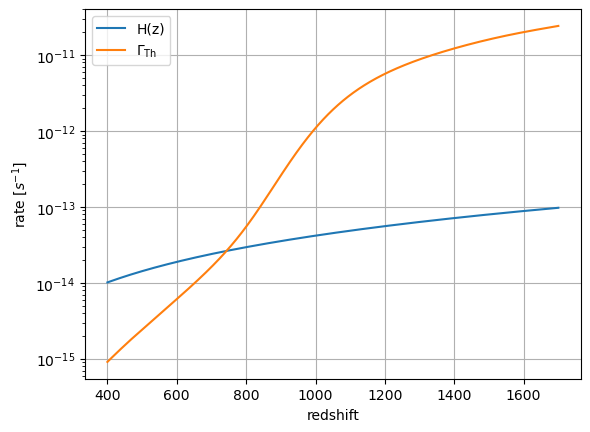

In [5]:
#plt.plot(z, gh, label='$\Gamma_{\mathrm{rec}}$')
plt.plot(z, hu, label='H(z)')
plt.plot(z, gth, label='$\Gamma_{\mathrm{Th}}$')
plt.yscale('log')
plt.ylabel('rate [$s^{-1}$]')
plt.xlabel('redshift')
plt.legend()
plt.grid()
plt.savefig('Images/thomson rates.png', dpi=300)
plt.show()

In [6]:
#freeze-out of thomson scat
delt_th = gth-hu
for i in range(len(z)-1, 0, -1):
    if delt_th[i] >= 0:
        print('Thomson freeze-out at z = ',z[i])
        print(delt_th[i])
        break

Thomson freeze-out at z =  743.5435435435436
4.9415415529646694e-17


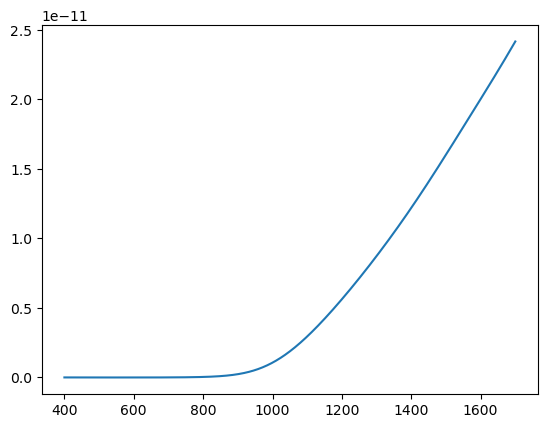

In [7]:
#plt.plot(z, Gam_Th(z))
plt.plot(z, delt_th)

In [8]:
print(Hubble(700))
print(gth)
print(z)

2.399952658478293e-14
[2.42449797e-11 2.41888451e-11 2.41327147e-11 2.40766559e-11
 2.40206681e-11 2.39647513e-11 2.39089049e-11 2.38531283e-11
 2.37974215e-11 2.37417834e-11 2.36862140e-11 2.36307127e-11
 2.35752790e-11 2.35199126e-11 2.34646129e-11 2.34093794e-11
 2.33542115e-11 2.32991086e-11 2.32440705e-11 2.31890964e-11
 2.31341858e-11 2.30793382e-11 2.30245529e-11 2.29698294e-11
 2.29151671e-11 2.28605653e-11 2.28060236e-11 2.27515412e-11
 2.26971173e-11 2.26427516e-11 2.25884432e-11 2.25341914e-11
 2.24799957e-11 2.24258553e-11 2.23717693e-11 2.23177372e-11
 2.22637582e-11 2.22098315e-11 2.21559563e-11 2.21021319e-11
 2.20483573e-11 2.19946320e-11 2.19409553e-11 2.18873263e-11
 2.18337441e-11 2.17802079e-11 2.17267167e-11 2.16732697e-11
 2.16198660e-11 2.15665047e-11 2.15131850e-11 2.14599060e-11
 2.14066668e-11 2.13534666e-11 2.13003045e-11 2.12471796e-11
 2.11940909e-11 2.11410373e-11 2.10880181e-11 2.10350320e-11
 2.09820785e-11 2.09291565e-11 2.08762649e-11 2.08234030e-11
 2